<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


I downloaded in a diferent way that was asked as in this way works better

### Load Data From CSV File


In [6]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

### Convert to date time object


In [7]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [8]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [9]:
!pip install seaborn
print("done")

done


In [ ]:
# notice: installing seaborn might takes a few minutes


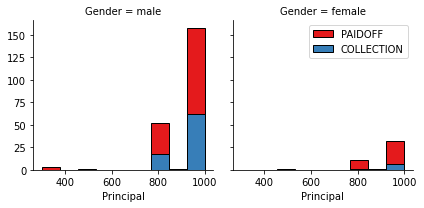

In [10]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

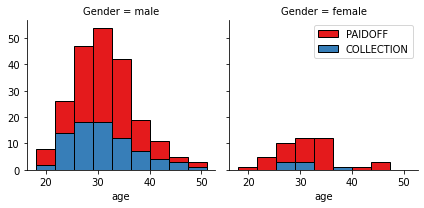

In [11]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


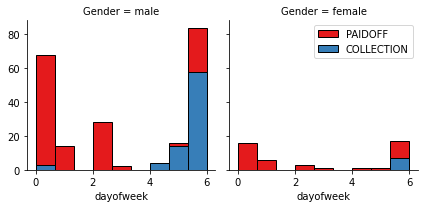

In [12]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [13]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [14]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [15]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [16]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [17]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [18]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [19]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [20]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [21]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


### Train  test split

In [29]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size =0.2, random_state=4)

In [30]:
from  sklearn.neighbors import KNeighborsClassifier

In [31]:
k=4
neigh=KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)

In [32]:
y_ach= neigh.predict(x_test)

In [33]:
from sklearn import metrics
print("for the train:  ", metrics.accuracy_score(y_train,neigh.predict(x_train)))
print("for the test:  ", metrics.accuracy_score(y_test,y_ach))

for the train:   0.8188405797101449
for the test:   0.7


### lets try with diferet K values

In [34]:
#Determine K value through Accuracy Evaluation:
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.65714286, 0.58571429, 0.74285714, 0.7       , 0.74285714,
       0.71428571, 0.78571429, 0.75714286, 0.75714286])

In [35]:
yhat = neigh.predict(X_test)


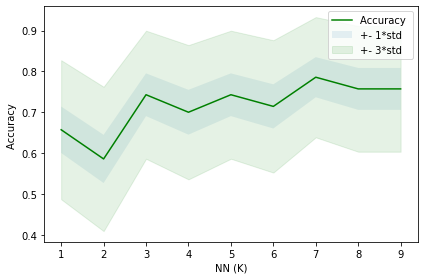

our best choice for accuracy is:  0.7857142857142857 with k= 7


In [36]:
# plot for to see how preform with the diferent values of K

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+- 1*std','+- 3*std'))
plt.ylabel('Accuracy ')
plt.xlabel('NN (K)')
plt.tight_layout()
plt.show()

print( "our best choice for accuracy is: ", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

In [41]:
#Build the model  
knn = KNeighborsClassifier(n_neighbors = mean_acc.argmax()+1)
#Fit the model with the training set
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [42]:
KNN_yat = knn.predict(X_test)

# Decision Tree


In [108]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(criterion="entropy",max_depth=4)
tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [109]:
pdrtree = tree.predict(X_test)

In [110]:
metrics.accuracy_score(y_test,pdrtree)

0.6142857142857143

### im not very convinced about this so lets try few diferent valuse for depth

In [111]:
ds = 10
mean_acc = np.zeros((ds-1))
std_acc = np.zeros((ds-1))

for d in range(1,ds):
    
    dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = d).fit(X_train, y_train)  
    yhat=dt.predict(X_test)

    mean_acc[d-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[d-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
    print("depth = {}  the accuracy score is: {} ".format(d, mean_acc[d-1]))

depth = 1  the accuracy score is: 0.7857142857142857 
depth = 2  the accuracy score is: 0.7857142857142857 
depth = 3  the accuracy score is: 0.6142857142857143 
depth = 4  the accuracy score is: 0.6142857142857143 
depth = 5  the accuracy score is: 0.6428571428571429 
depth = 6  the accuracy score is: 0.7714285714285715 
depth = 7  the accuracy score is: 0.7571428571428571 
depth = 8  the accuracy score is: 0.7571428571428571 
depth = 9  the accuracy score is: 0.6571428571428571 


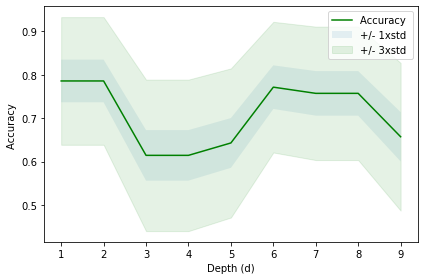

our best choise would be:  0.7857142857142857 with d= 1


In [112]:
#plot the figure to have a bit more insights of the distribution
plt.plot(range(1,ds),mean_acc,'g')
plt.fill_between(range(1,ds),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,ds),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Depth (d)')
plt.tight_layout()
plt.show()

print( "our best choise would be: ", mean_acc.max(), "with d=", mean_acc.argmax()+1)

### Our best choise is 1 but as 2 have the same impact i feel 2 will preform better in the long run, i could inclusive considerer 6 as preform similar but i dont want to overfit the system, i would do more trys but for now is fine.

In [113]:
#now we build the model with the K=2 that we choose.
prefectree=DecisionTreeClassifier(criterion="entropy",max_depth=2)
prefectree.fit(X_train,y_train)
pdrtree = tree.predict(X_test)


[Text(0.5, 0.8333333333333334, 'X[4] <= -0.188\nentropy = 0.823\nsamples = 276\nvalue = [71, 205]'),
 Text(0.25, 0.5, 'X[7] <= 0.14\nentropy = 0.126\nsamples = 116\nvalue = [2, 114]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.0\nsamples = 71\nvalue = [0, 71]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.262\nsamples = 45\nvalue = [2, 43]'),
 Text(0.75, 0.5, 'X[1] <= -1.46\nentropy = 0.986\nsamples = 160\nvalue = [69, 91]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.99\nsamples = 156\nvalue = [69, 87]')]

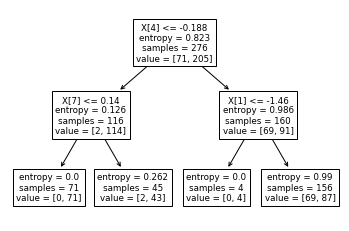

In [114]:
from sklearn import tree
tree.plot_tree(prefectree)

# Support Vector Machine


In [115]:
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import itertools
#Use the Radial Basis
svm_model = svm.SVC(kernel='rbf')
#Fit the model 
svm_model.fit(X_train, y_train) 

SVC()

In [116]:
yat = svm_model.predict(X_test)
yat

array(['COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'COLLECTION', 'PAIDOFF', 'COLLECTION',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

# Logistic Regression


In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

In [118]:
# this actually took me time to decide how to do this, but we got here to choose what function to calculate which is the best solver
Lloss = np.zeros(5)
solver=['liblinear','saga' ,'lbfgs', 'newton-cg', 'sag']
for n,k in enumerate(solver):
    logist = LogisticRegression(C = 0.01, solver = k).fit(X_train, y_train)
    lyhat = logist.predict(X_test)
    y_prob = logist.predict_proba(X_test)
    Lloss[n]=log_loss(y_test, y_prob)
print("Our best probability is: ",Lloss.max()," For our solver: ",solver[Lloss.argmax()])    



Our best probability is:  0.5772287609479654  For our solver:  liblinear


In [127]:
#we train and fit our new model
LRmodel = LogisticRegression(solver = 'liblinear', C=0.01).fit(X_train,y_train)

In [128]:
#predict some y for x test
yhat = LRmodel.predict(X_test)
yhat[0:5]

array(['COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

# Model Evaluation using Test set


In [120]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


First, download and load the test set:


In [121]:
df=pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


### Load Test set for evaluation


In [149]:
#we do the usual transforming date types to date time objects
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df['dayofweek'] = df['effective_date'].dt.dayofweek

#we set a threshold of less than 4 days
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

#we convert the gender in numerical values
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

#we hot encoding for education 
test_feat = df[['Principal','terms','age','Gender','weekend']]
test_feat = pd.concat([test_feature,pd.get_dummies(df['education'])], axis=1)
test_feat.drop(['Master or Above'], axis = 1,inplace=True)

# we do some testing
X_test = test_feat

# Normalize the data
X_test = preprocessing.StandardScaler().fit(X_loan_test).transform(X_loan_test)

# Target result
y_test = df['loan_status'].values

#checking that everything works fine
y_test

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'COLLECTION', 'COLLECTION', 'COLLECTION', 'COLLECTION',
       'COLLECTION', 'COLLECTION', 'COLLECTION', 'COLLECTION',
       'COLLECTION', 'COLLECTION', 'COLLECTION', 'COLLECTION',
       'COLLECTION'], dtype=object)

### Working with the models that we construct before and getting some metrics

In [166]:
#KNN
knn_yhat = knn.predict(X_test)
#F1 Score:
knn_f1 = round(f1_score(y_test, knn_yhat, average = 'weighted'), 2)
#Jaccard Score:
knn_js = round(jaccard_score(y_test, knn_yhat, pos_label = "PAIDOFF"), 2)

# Decision Tree
Tree_yhat = prefectree.predict(X_test)
#F1 Score:
Tree_f1 = round(f1_score(y_test, loanTree_yhat, average = 'weighted'), 2)
#Jaccard Score:
Tree_js = round(jaccard_score(y_test, loanTree_yhat, pos_label = "PAIDOFF"), 2)

# Support Vector Machine
svm_yhat = svm_model.predict(X_test)
#F1 Score:
svm_f1 = round(f1_score(y_test, svm_model_yhat, average = 'weighted'), 2)
#Jaccard Score:
svm_js = round(jaccard_score(y_test, svm_model_yhat, pos_label = "PAIDOFF"), 2)

# Logistic Regression
LR_yhat = LRmodel.predict(X_test)
#F1 Score:
LR_f1 = round(f1_score(y_test, LR_model_yhat, average = 'weighted'), 2)
#Jaccard Score:
LR_js = round(jaccard_score(y_test, LR_model_yhat, pos_label = "PAIDOFF"), 2)

#LogLoss:
LR_logloss = round(log_loss(y_test, LRmodel.predict_proba(X_test)),2)

In [164]:
#Scores
F1_scores = [knn_f1, Tree_f1, svm_f1, LR_f1]
Jaccard_scores = [knn_js, Tree_js, svm_js, LR_js]
LogLoss_scores = ['NA', 'NA', 'NA', LR_logloss]

values = [Jaccard_scores, F1_scores, LogLoss_scores]
#checking all alright
values

[[0.67, 0.74, 0.78, 0.74], [0.66, 0.63, 0.76, 0.66], ['NA', 'NA', 'NA', 0.57]]

In [170]:
metrics = ['Jaccard', 'F1-score', 'Logloss']
algorithms = ['KNN', 'Decision Tree', 'SVM', 'Logistic Regression']

accuracy_report = pd.DataFrame(values, index = metrics, columns = algorithms)
accuracy_report.index.rename("Algorithm", inplace=True)
accuracy_report.transpose()




Algorithm,Jaccard,F1-score,Logloss
KNN,0.67,0.66,NA
Decision Tree,0.74,0.63,NA
SVM,0.78,0.76,NA
Logistic Regression,0.74,0.66,0.57


As we can see SVM score better in the jaccard and the F1-score so this should be the model that we will use

# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
